In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD DATA
path_2023 = "../data/UF_2023.csv"
path_2024 = "../data/UF_2024.csv"

data1 = pd.read_csv(path_2023)
data2 = pd.read_csv(path_2024)

In [3]:
# CREATE DATAFRAMES
df1 = pd.DataFrame(data = data1)
df2 = pd.DataFrame(data = data2)

In [4]:
# DATAFRAMES

In [5]:
df1.head()

,Unnamed: 0,fecha,valor
0,0,2023-12-31T03:00:00.000Z,36789.36
1,1,2023-12-30T03:00:00.000Z,36781.09
2,2,2023-12-29T03:00:00.000Z,36772.81
3,3,2023-12-28T03:00:00.000Z,36764.54
4,4,2023-12-27T03:00:00.000Z,36756.26


In [6]:
df2.head()

,Unnamed: 0,fecha,valor
0,0,2024-12-09T03:00:00.000Z,38362.26
1,1,2024-12-08T03:00:00.000Z,38349.54
2,2,2024-12-07T03:00:00.000Z,38336.83
3,3,2024-12-06T03:00:00.000Z,38324.11
4,4,2024-12-05T03:00:00.000Z,38311.40


In [7]:
# JOIN BOTH DATAFRAMES
df = pd.concat([df2, df1], ignore_index = True)

In [8]:
df.head()

,Unnamed: 0,fecha,valor
0,0,2024-12-09T03:00:00.000Z,38362.26
1,1,2024-12-08T03:00:00.000Z,38349.54
2,2,2024-12-07T03:00:00.000Z,38336.83
3,3,2024-12-06T03:00:00.000Z,38324.11
4,4,2024-12-05T03:00:00.000Z,38311.40


In [9]:
df.tail()

,Unnamed: 0,fecha,valor
704,360,2023-01-05T03:00:00.000Z,35167.38
705,361,2023-01-04T03:00:00.000Z,35156.09
706,362,2023-01-03T03:00:00.000Z,35144.81
707,363,2023-01-02T03:00:00.000Z,35133.53
708,364,2023-01-01T03:00:00.000Z,35122.26


In [10]:
df.drop(columns="Unnamed: 0", inplace = True)

In [11]:
df.columns

Index(['fecha', 'valor'], dtype='object')

In [12]:
df["fecha"].head()

0    2024-12-09T03:00:00.000Z
1    2024-12-08T03:00:00.000Z
2    2024-12-07T03:00:00.000Z
3    2024-12-06T03:00:00.000Z
4    2024-12-05T03:00:00.000Z
Name: fecha, dtype: object

In [13]:
df["fecha"] = df["fecha"].str[:10]

In [14]:
df.head()

,fecha,valor
0,2024-12-09,38362.26
1,2024-12-08,38349.54
2,2024-12-07,38336.83
3,2024-12-06,38324.11
4,2024-12-05,38311.40


In [15]:
# CHANGE DATE FORMAT
from datetime import datetime 

In [16]:
df.dropna(inplace=True)

In [17]:
df["fecha"] = [datetime.strptime(str(x), "%Y-%m-%d").strftime("%d-%m-%Y") for x in df["fecha"]]

In [18]:
df["fecha"].head()

0    09-12-2024
1    08-12-2024
2    07-12-2024
3    06-12-2024
4    05-12-2024
Name: fecha, dtype: object

In [19]:
df.head()

,fecha,valor
0,09-12-2024,38362.26
1,08-12-2024,38349.54
2,07-12-2024,38336.83
3,06-12-2024,38324.11
4,05-12-2024,38311.40


In [20]:
# TIME SERIES CHART

In [33]:
df.head(10)

,valor
fecha,
2023-01-01,35122.26
2023-01-02,35133.53
2023-01-03,35144.81
2023-01-04,35156.09
2023-01-05,35167.38
2023-01-06,35178.67
2023-01-07,35189.96
2023-01-08,35201.26
2023-01-09,35212.56


In [24]:
df["fecha"] = pd.to_datetime(arg = df["fecha"], dayfirst = True)

In [25]:
df.head()

,fecha,valor
0,2024-12-09,38362.26
1,2024-12-08,38349.54
2,2024-12-07,38336.83
3,2024-12-06,38324.11
4,2024-12-05,38311.40


In [26]:
df.set_index(keys = "fecha", inplace = True)

In [27]:
df.head()

,valor
fecha,
2024-12-09,38362.26
2024-12-08,38349.54
2024-12-07,38336.83
2024-12-06,38324.11
2024-12-05,38311.40


In [29]:
df.columns

Index(['valor'], dtype='object')

In [31]:
df.sort_values(by = "fecha", inplace = True)

In [32]:
df.head()

,valor
fecha,
2023-01-01,35122.26
2023-01-02,35133.53
2023-01-03,35144.81
2023-01-04,35156.09
2023-01-05,35167.38


Text(0, 0.5, 'Precio')

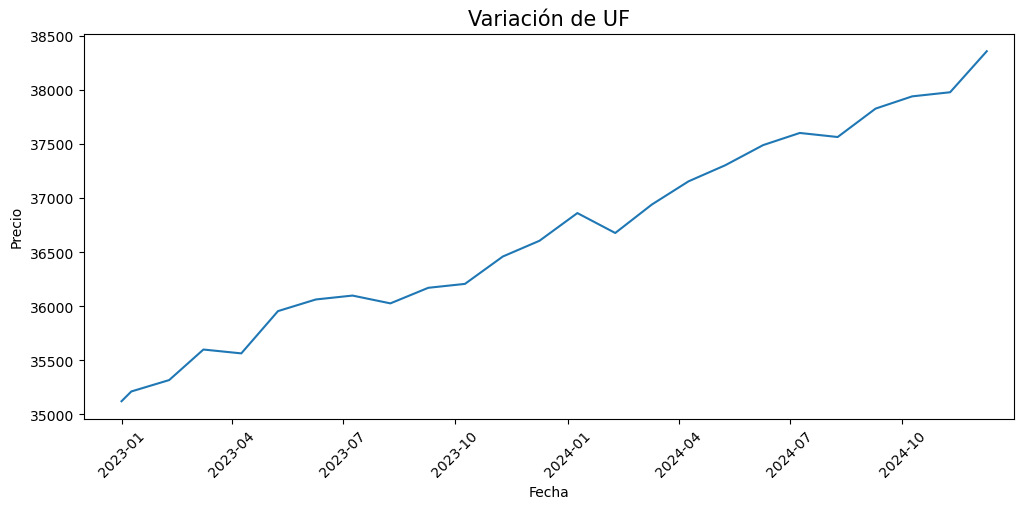

In [44]:
# Chart
fig = plt.subplots(figsize=(12, 5))
plt.plot(df.index, df["valor"])
plt.title("Variación de UF", fontsize = 15)
plt.xlabel('Fecha', fontsize=10)
plt.xticks(rotation = 45)
plt.xlim(pd.Timestamp('2022-12-01'), pd.Timestamp('2024-12-31'))
plt.ylabel('Precio', fontsize=10)

In [45]:
# ADD VARIATION COLUMNS (in CLP & percentage)

In [47]:
# result = [item for index, item in enumerate(my_list) if index == 0]
columna_variacion_clp = [ 0 if index == 0 else df["valor"][index] - df["valor"][index - 1] for index, value in enumerate(df["valor"])]

C:\Users\sebal\AppData\Local\Temp\ipykernel_2448\169215335.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  columna_variacion_clp = [ 0 if index == 0 else df["valor"][index] - df["valor"][index - 1] for index, value in enumerate(df["valor"])]


In [58]:
# columna_variacion_clp

In [49]:
df.head(3)

,valor
fecha,
2023-01-01,35122.26
2023-01-02,35133.53
2023-01-03,35144.81


In [50]:
df["variacion_clp"] = columna_variacion_clp

In [51]:
df.head()

,valor,variacion_clp
fecha,,
2023-01-01,35122.26,0.00
2023-01-02,35133.53,11.27
2023-01-03,35144.81,11.28
2023-01-04,35156.09,11.28
2023-01-05,35167.38,11.29


In [53]:
# columna_variacion_clp = [ 0 if index == 0 else df["valor"][index] - df["valor"][index - 1] for index, value in enumerate(df["valor"])]
columna_variacion_per = [ 0 if index == 0 
                         else (df["variacion_clp"][index] * 100) / df["valor"][index - 1] 
                         for index, value in enumerate(df["variacion_clp"])]

C:\Users\sebal\AppData\Local\Temp\ipykernel_2448\415150489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  else (df["variacion_clp"][index] * 100) / df["valor"][index - 1]


In [60]:
# columna_variacion_per

In [55]:
df["variacion_%"] = columna_variacion_per

In [56]:
df.head(10)

,valor,variacion_clp,variacion_%
fecha,,,
2023-01-01,35122.26,0.00,0.000000
2023-01-02,35133.53,11.27,0.032088
2023-01-03,35144.81,11.28,0.032106
2023-01-04,35156.09,11.28,0.032096
2023-01-05,35167.38,11.29,0.032114
2023-01-06,35178.67,11.29,0.032104
2023-01-07,35189.96,11.29,0.032093
2023-01-08,35201.26,11.30,0.032111
2023-01-09,35212.56,11.30,0.032101


In [57]:
df.tail(10)

,valor,variacion_clp,variacion_%
fecha,,,
2024-11-30,38247.92,12.68,0.033163
2024-12-01,38260.61,12.69,0.033178
2024-12-02,38273.30,12.69,0.033167
2024-12-03,38286.00,12.70,0.033182
2024-12-04,38298.70,12.70,0.033171
2024-12-05,38311.40,12.70,0.033160
2024-12-06,38324.11,12.71,0.033176
2024-12-07,38336.83,12.72,0.033191
2024-12-08,38349.54,12.71,0.033153


Text(0, 0.5, 'Variación')

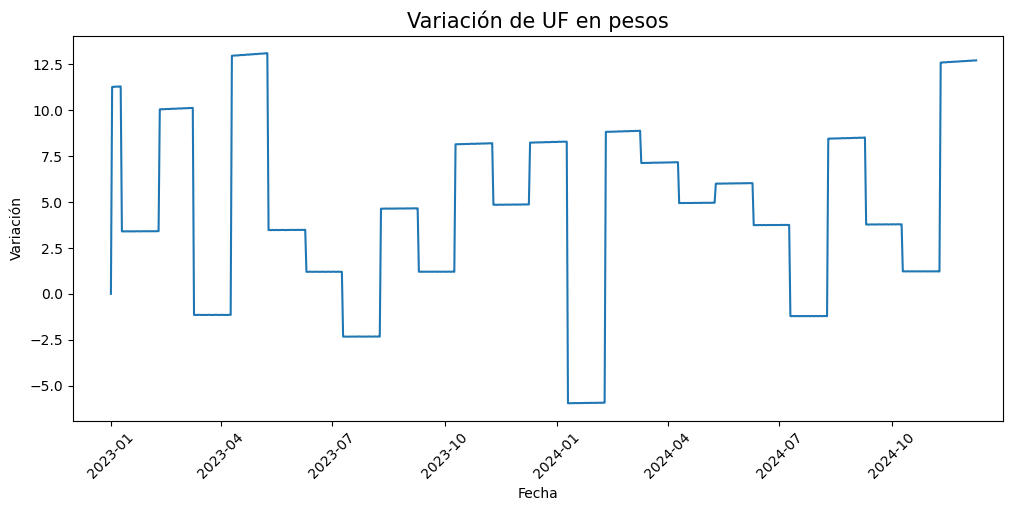

In [63]:
# Chart
fig = plt.subplots(figsize=(12, 5))
plt.plot(df.index, df["variacion_clp"])
plt.title("Variación de UF en pesos", fontsize = 15)
plt.xlabel('Fecha', fontsize=10)
plt.xticks(rotation = 45)
plt.xlim(pd.Timestamp('2022-12-01'), pd.Timestamp('2024-12-31'))
plt.ylabel('Variación', fontsize=10)

In [64]:
# Save data
path = "../data_processed/UF_2023_2024.csv"
df.to_csv(path)